HOUSING DATA ANALYSIS: PREDICT HOUSE PRICES

This analysis predicts home prices using various regression techniques including linear, lasso, ridge, KNN, and Random Forests.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv', 'data_description.txt']


READ IN THE DATA FILES 

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
sample = pd.read_csv('../input/sample_submission.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [5]:
#Lets have a look at the data
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

DROP COLUMNS - If they have too few data points to be useful

Some of the features have too few data points to be able to meaningfully predict from

In [6]:
def drop_cols(dataframe, a_list):
    dataframe.drop(a_list, axis=1,inplace = True)
drop1 =  ['Fence','PoolQC','MiscFeature','Alley'] #too few observations


drop_cols(train,drop1)
drop_cols(test,drop1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

CREATE NUMERICAL AND CATEGORICAL LABELS

In [7]:
columns = ['DataType']
column_data = pd.DataFrame(index = train.columns, columns = columns)

In [8]:
corr = train.corr()
corr_index = corr.index

In [9]:
for item in corr_index:
    column_data.loc[item, 'DataType'] = 'Numeric'

for item in column_data.index:
    if column_data.loc[item, 'DataType'] != 'Numeric':
        column_data.loc[item, 'DataType'] = 'Categorical'
        

HAVE A LOOK AT CATEGORICAL COLUMNS - If nearly all the data is in on one category, we'll drop that feature because it may skew the results

In [10]:
categorical = column_data[column_data['DataType'] == 'Categorical']
categorical_features = pd.DataFrame()
for column in train.columns:
    if column in categorical.index:
        categorical_features[column] = train[column]
categorical_features.columns
# look at the value counts
for column in categorical_features.columns:
    print(column)
    print(keep_columns[column].value_counts())

MSZoning


NameError: name 'keep_columns' is not defined

In [11]:
#The list below contains categories with little variety so we will drop them from the analysis
drop2 =  ['Street', 'Utilities', 'Condition2','RoofMatl', 'Heating'] 
drop_cols(train, drop2)
drop_cols(test, drop2)

Now we've removed some of the bad columns from our "train" dataframe, and lets move on to the target

TARGET ->SALE PRICE

In [12]:
target = train['SalePrice']
train.corrwith(target).sort_values() #Quality and Area are the most highly correlated with Price

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
dtype: float

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


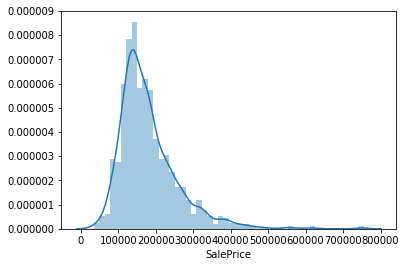

In [13]:
sns.distplot(target,bins=50)

The distplot shows us that there is a long tail on the expensive end, but the data ends around zero, as we'd expect
Let's have a look at plots of some of the highly correlated features

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


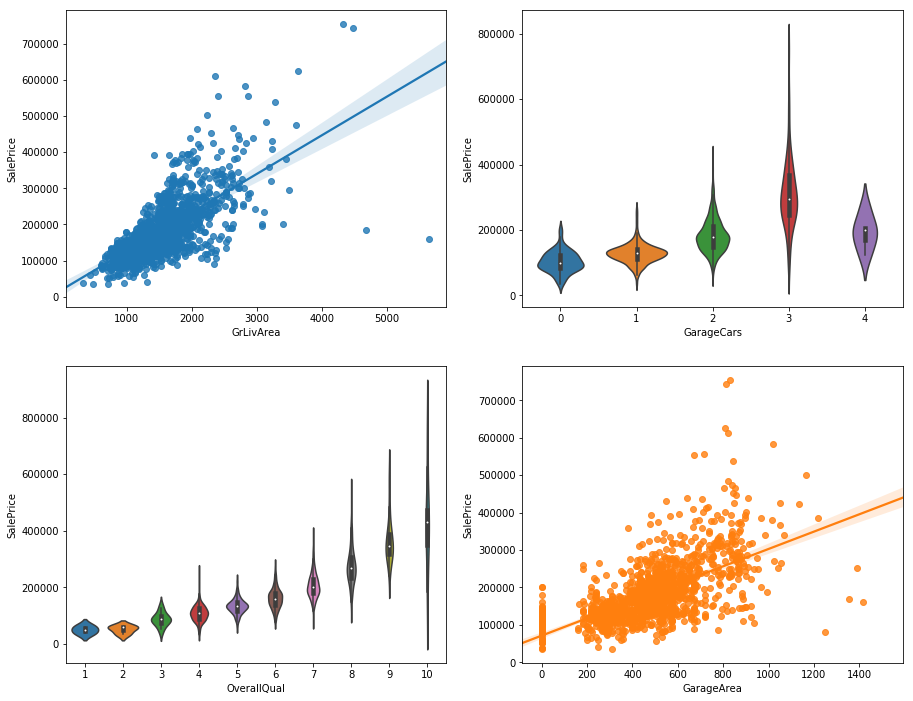

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15,12))

sns.regplot(x='GrLivArea',y='SalePrice',data=train, ax=axes[0,0])
sns.violinplot(x='OverallQual',y='SalePrice',data=train, ax=axes[1,0])
sns.violinplot(x='GarageCars',y='SalePrice',data=train, ax=axes[0,1])
sns.regplot(x='GarageArea',y='SalePrice',data=train, ax=axes[1,1])


#sns.scatterplot(x=train['GrLivArea'],y=target)

PLOTS OF CATEGORICAL FEATURES

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


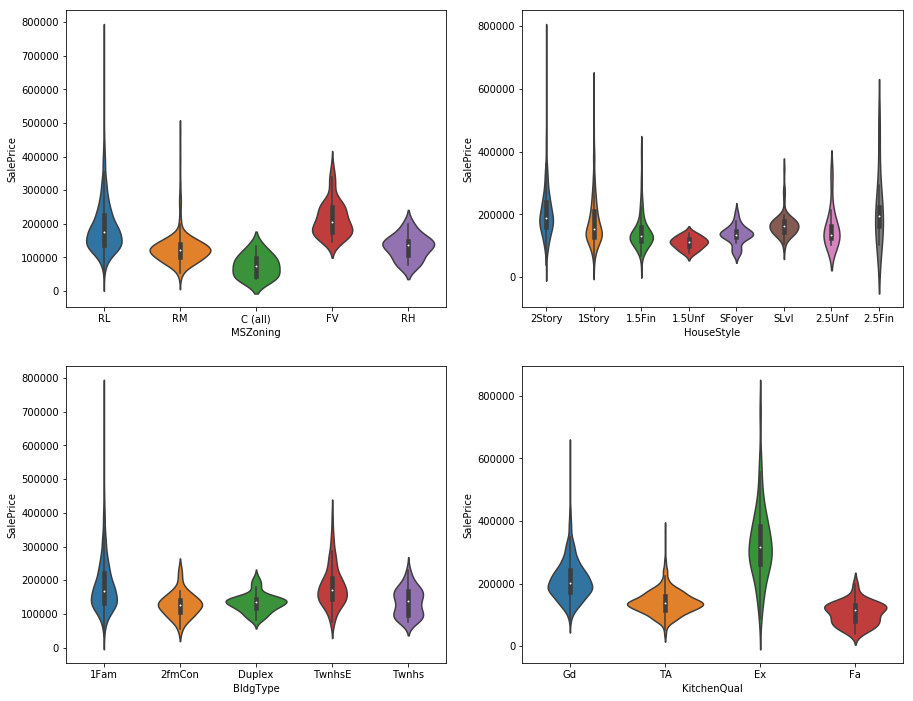

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15,12))

sns.violinplot(x='MSZoning',y='SalePrice',data=train, ax=axes[0,0])
sns.violinplot(x='BldgType',y='SalePrice',data=train, ax=axes[1,0])
sns.violinplot(x='HouseStyle',y='SalePrice',data=train, ax=axes[0,1])
sns.violinplot(x='KitchenQual',y='SalePrice',data=train, ax=axes[1,1])

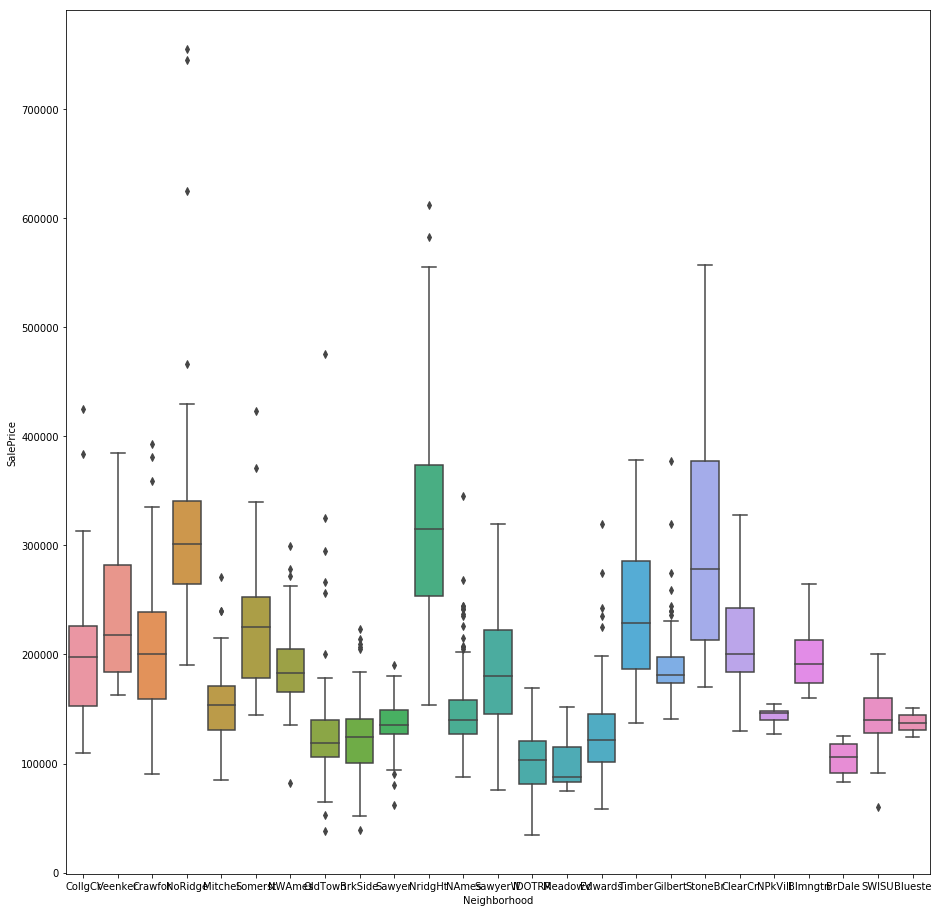

In [16]:
fig = plt.figure(figsize=(12,12))
axes = fig.add_axes([0,0,1,1])
sns.boxplot(x='Neighborhood',y='SalePrice',data=train)

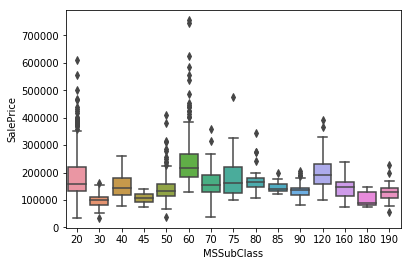

In [17]:
sns.boxplot(x='MSSubClass',y='SalePrice',data=train)

First we'll do an analysis of the numeric and categorical features seperately to see how they perform against both types of features combined. We'll make a dataframe for the numeric features and the categorical features to explore each independently

In [18]:
column_data['DataType']

Id                   Numeric
MSSubClass           Numeric
MSZoning         Categorical
LotFrontage          Numeric
LotArea              Numeric
Street           Categorical
LotShape         Categorical
LandContour      Categorical
Utilities        Categorical
LotConfig        Categorical
LandSlope        Categorical
Neighborhood     Categorical
Condition1       Categorical
Condition2       Categorical
BldgType         Categorical
HouseStyle       Categorical
OverallQual          Numeric
OverallCond          Numeric
YearBuilt            Numeric
YearRemodAdd         Numeric
RoofStyle        Categorical
RoofMatl         Categorical
Exterior1st      Categorical
Exterior2nd      Categorical
MasVnrType       Categorical
MasVnrArea           Numeric
ExterQual        Categorical
ExterCond        Categorical
Foundation       Categorical
BsmtQual         Categorical
                    ...     
BsmtHalfBath         Numeric
FullBath             Numeric
HalfBath             Numeric
BedroomAbvGr  

In [19]:
numeric_features = pd.DataFrame()
categorical_features = pd.DataFrame()
test_numeric_features = pd.DataFrame()
test_categorical_features = pd.DataFrame()

for item in test.columns:
    dt = column_data.loc[item,'DataType']
    if dt == 'Numeric':
        numeric_features[item] = train[item]
        test_numeric_features[item] = test[item]
    elif dt == 'Categorical':
        categorical_features[item] = train[item]
        test_categorical_features[item] = test[item]
print(numeric_features.columns)
print(categorical_features.columns)
print(len(numeric_features.columns))
print(len(test_numeric_features.columns))
print(len(categorical_features.columns))
print(len(test_categorical_features.columns))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')
Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu'

We can see that the numeric features dataframe has some columns that should either be categorical or are not useful for analysis. Let's go ahead and drop those from the numeric features dataframe

In [20]:

numeric_features.drop(['Id','EnclosedPorch','3SsnPorch','MiscVal','MSSubClass','MoSold'],axis=1, inplace=True)
test_numeric_features.drop(['Id','EnclosedPorch','3SsnPorch','MiscVal','MSSubClass','MoSold'],axis=1, inplace=True)
numeric_features.columns

#MSSubClass is categorical so we'll add that to the categorical dataframe
#MoSold could also be categorical but we'll ignore it for this analysis because if we are
#trying to predict the value of a future sale we won't know what month it will be sold in

categorical_features['MSSubClass'] = train['MSSubClass']
test_categorical_features['MSSubClass'] = test['MSSubClass']

In [21]:
numeric_features.info()
#We see some null values, we will impute those values to remove all Nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 31 columns):
LotFrontage     1201 non-null float64
LotArea         1460 non-null int64
OverallQual     1460 non-null int64
OverallCond     1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
MasVnrArea      1452 non-null float64
BsmtFinSF1      1460 non-null int64
BsmtFinSF2      1460 non-null int64
BsmtUnfSF       1460 non-null int64
TotalBsmtSF     1460 non-null int64
1stFlrSF        1460 non-null int64
2ndFlrSF        1460 non-null int64
LowQualFinSF    1460 non-null int64
GrLivArea       1460 non-null int64
BsmtFullBath    1460 non-null int64
BsmtHalfBath    1460 non-null int64
FullBath        1460 non-null int64
HalfBath        1460 non-null int64
BedroomAbvGr    1460 non-null int64
KitchenAbvGr    1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
Fireplaces      1460 non-null int64
GarageYrBlt     1379 non-null float64
GarageCars      1460 no

FILL IN NULL VALUES

In [22]:
#LotFrontage,MasVnrArea,GarageYrBlt
#Fill Null Lot Frontage
#Fill lot frontage based on the lot area times the average factor between area and frontage
factor_col = numeric_features['LotArea'] / numeric_features['LotFrontage']
factor = factor_col.mean()


In [23]:

for row in numeric_features.index:
    area = numeric_features.loc[row,'LotArea']
    frontage = numeric_features.loc[row,'LotFrontage']
    if pd.isnull(frontage):
        numeric_features.loc[row,'LotFrontage'] = area / factor

In [24]:
#fill MasVnr with the mean from the dataset
mean_MasVnr = numeric_features['MasVnrArea'].mean()
for row in numeric_features.index:
    vnr = numeric_features.loc[row,'MasVnrArea']
    if pd.isnull(vnr):
        numeric_features.loc[row,'MasVnrArea']= mean_MasVnr

In [25]:
#fill Garage Year Built with same as the year the house was built, if null
for row in numeric_features.index:
    if pd.isnull(numeric_features.loc[row,'GarageYrBlt']):
        numeric_features.loc[row,'GarageYrBlt'] =  numeric_features.loc[row,'YearBuilt']

We should now have no NULL values in the dataset

In [26]:
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 31 columns):
LotFrontage     1460 non-null float64
LotArea         1460 non-null int64
OverallQual     1460 non-null int64
OverallCond     1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
MasVnrArea      1460 non-null float64
BsmtFinSF1      1460 non-null int64
BsmtFinSF2      1460 non-null int64
BsmtUnfSF       1460 non-null int64
TotalBsmtSF     1460 non-null int64
1stFlrSF        1460 non-null int64
2ndFlrSF        1460 non-null int64
LowQualFinSF    1460 non-null int64
GrLivArea       1460 non-null int64
BsmtFullBath    1460 non-null int64
BsmtHalfBath    1460 non-null int64
FullBath        1460 non-null int64
HalfBath        1460 non-null int64
BedroomAbvGr    1460 non-null int64
KitchenAbvGr    1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
Fireplaces      1460 non-null int64
GarageYrBlt     1460 non-null float64
GarageCars      1460 no

CLEAN THE CATEGORICAL FEATURES DATAFRAME

In [27]:
categorical_features.info() #We need to do something to deal with the Null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
MSZoning         1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422 non-null object
BsmtFinType1     1423 non-null object
BsmtFinType2     1422 non-null object
HeatingQC        1460 non-null object
CentralAir       1460 non-null object
Electrical       14

In [28]:
#FireplaceQu we'll drop because it has so few rows and the rest we'll replace with None
#categorical_feats.drop('FireplaceQu',axis=1, inplace=True)
categorical_features.fillna('None',inplace=True)
test_categorical_features.fillna('None',inplace=True)
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
MSZoning         1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1460 non-null object
BsmtCond         1460 non-null object
BsmtExposure     1460 non-null object
BsmtFinType1     1460 non-null object
BsmtFinType2     1460 non-null object
HeatingQC        1460 non-null object
CentralAir       1460 non-null object
Electrical       14

In [29]:
#We'll make a dummy variable dataframe with the categorical features
categorical_dummies = pd.get_dummies(categorical_features)
test_categorical_dummies = pd.get_dummies(test_categorical_features)
print(len(categorical_dummies.columns))
print(len(test_categorical_dummies.columns))

225
224


In [30]:
not_in_test = []
for x in categorical_dummies.columns:
    if x not in test_categorical_dummies.columns:
        not_in_test.append(x)
not_in_train = []
for x in test_categorical_dummies.columns:
    if x not in categorical_dummies.columns:
        not_in_train.append(x)
        
for x in not_in_test:
    test_categorical_dummies[x] = 0
for x in not_in_train:
    categorical_dummies[x] = 0

In [31]:
print(len(categorical_dummies.columns))
print(len(test_categorical_dummies.columns))

231
231


START OF LINEAR REGRESSION

Let's look at the numerical features first

In [32]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge 
lin_mod = linear_model.LinearRegression()

In [33]:
X = numeric_features
y = target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 17)

In [34]:
lin_mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
test_pred1 = lin_mod.predict(X_test)
test_pred1[test_pred1<0] = 0.1 #Can't have negative value in RMSLE (or negative house price)
train_pred1 = lin_mod.predict(X_train)
train_pred1[train_pred1<0] = 0.1

In [36]:
def RMSLE(actual, predictions):
    total = 0.0
    for x in range(len(predictions)):
        log_pred = np.log(predictions[x]+1)
        log_actual = np.log(actual.iloc[x]+1)
        total = total + (log_pred - log_actual)**2
    rmsle = (total/len(predictions)) ** 0.5
    return rmsle

RMSLE(y_test, test_pred1)


0.16804679983903198

In [37]:
print(RMSLE(y_train,train_pred1))

0.5144142818985257


LETS MAKE A DATAFRAME TO TRACK THE RESULTS FOR DIFFERENT MODELS WE CREATE

In [38]:
performance_df = pd.DataFrame(index = ['Num Feats','Cat Feats','All Feats'],columns = ['Test R^2','Train R^2','Test RMSLE', 'Train RMSLE'])
testR2 = r2_score(y_test, test_pred1)
trainR2 = r2_score(y_train, train_pred1)
testRMSLE = RMSLE(y_test,test_pred1)
trainRMSLE = RMSLE(y_train,train_pred1)
print('Test R^2:' ,testR2)
print('Train R^2:',trainR2)
print('Test RMSLE:', testRMSLE)
print('Train RMSLE:', trainRMSLE)
performance_df.loc['Num Feats'] = [testR2,trainR2,testRMSLE,trainRMSLE]

Test R^2: 0.8445162624201987
Train R^2: 0.7895181780169884
Test RMSLE: 0.16804679983903198
Train RMSLE: 0.5144142818985257


LETS SEE IF THE CATEGORICAL FEATURES CAN DO ANY BETTER

In [39]:
X = categorical_dummies
y = target

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=17)

In [41]:
X_train.columns

Index(['MSSubClass', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg',
       ...
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'MSZoning_None', 'Exterior1st_None',
       'Exterior2nd_None', 'KitchenQual_None', 'Functional_None',
       'SaleType_None'],
      dtype='object', length=231)

In [42]:
categorical_model = linear_model.LinearRegression()

In [43]:
categorical_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
test_pred2 = categorical_model.predict(X_test)
test_pred2[test_pred2<0] = 0.1
train_pred2 = categorical_model.predict(X_train)
train_pred2[train_pred2<0] = 0.1

In [45]:
testR2 = r2_score(y_test, test_pred2)
trainR2 = r2_score(y_train, train_pred2)
testRMSLE = RMSLE(y_test,test_pred2)
trainRMSLE = RMSLE(y_train,train_pred2)
print('Test R^2:' ,testR2)
print('Train R^2:',trainR2)
print('Test RMSLE:', testRMSLE)
print('Train RMSLE:', trainRMSLE)
performance_df.loc['Cat Feats'] = [testR2,trainR2,testRMSLE,trainRMSLE]

Test R^2: 0.741717776261102
Train R^2: 0.8347258281253676
Test RMSLE: 1.2728739015196122
Train RMSLE: 0.1572867523826862


That's just plain terrible....

In [46]:
categorical_model.coef_
#there are some very large coefficients 

array([ 2.91345309e+01, -5.06191455e+13, -5.06191454e+13, -5.06191454e+13,
       -5.06191454e+13, -5.06191454e+13,  4.62267684e+13,  4.62267684e+13,
        4.62267684e+13,  4.62267684e+13,  2.75585537e+14,  2.75585537e+14,
        2.75585537e+14,  2.75585537e+14,  2.36823711e+14,  2.36823711e+14,
        2.36823711e+14,  2.36823711e+14,  2.36823711e+14,  5.94222575e+13,
        5.94222575e+13,  5.94222575e+13,  3.27217612e+13,  3.27217612e+13,
        3.27217612e+13,  3.27217612e+13,  3.27217612e+13,  3.27217612e+13,
        3.27217612e+13,  3.27217612e+13,  3.27217612e+13,  3.27217612e+13,
        3.27217612e+13,  3.27217612e+13,  3.27217612e+13,  3.27217613e+13,
        3.27217612e+13,  3.27217613e+13,  3.27217613e+13,  3.27217612e+13,
        3.27217612e+13,  3.27217612e+13,  3.27217612e+13,  3.27217612e+13,
        3.27217613e+13,  3.27217612e+13,  3.27217613e+13, -3.32124395e+13,
       -3.32124395e+13, -3.32124395e+13, -3.32124395e+13, -3.32124395e+13,
       -3.32124395e+13, -

Let's combine the numerical and categorical dataframes and run a linear regression on all the features

ALL FEATURES

In [47]:
combined_features = pd.concat([numeric_features,categorical_dummies],axis =1)

In [48]:
#just to make sure they add up correctly
print(len(numeric_features.columns))
print(len(categorical_dummies.columns))
print(len(combined_features.columns))

31
231
262


In [49]:
sum(combined_features.isna().sum(axis=0))

0

In [50]:
X = combined_features
y = target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=17)

In [51]:
allfeat_model = linear_model.LinearRegression()

In [52]:
allfeat_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
test_pred3 = allfeat_model.predict(X_test)
test_pred3[test_pred3<0] = 0.1
train_pred3 = allfeat_model.predict(X_train)
train_pred3[train_pred3<0] = 0.1

In [54]:
testR2 = r2_score(y_test, test_pred3)
trainR2 = r2_score(y_train, train_pred3)
testRMSLE = RMSLE(y_test,test_pred3)
trainRMSLE = RMSLE(y_train,train_pred3)
print('Test R^2:' ,testR2)
print('Train R^2:',trainR2)
print('Test RMSLE:', testRMSLE)
print('Train RMSLE:', trainRMSLE)
performance_df.loc['All Feats'] = [testR2,trainR2,testRMSLE,trainRMSLE]

Test R^2: 0.8662641744116961
Train R^2: 0.8955512383346881
Test RMSLE: 0.5556380923564731
Train RMSLE: 0.12728589202070023


In [55]:
performance_df

,Test R^2,Train R^2,Test RMSLE,Train RMSLE
Num Feats,0.844516,0.789518,0.168047,0.514414
Cat Feats,0.741718,0.834726,1.27287,0.157287
All Feats,0.866264,0.895551,0.555638,0.127286


Now this model is getting closer. Let's see what we can do to improve. Are there any features we want to just toss? Let's remember what we had in there

In [56]:
numeric_features.columns #Lets remove YrSold,GarageYrBlt,YearRemodAdd

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch',
       'PoolArea', 'YrSold'],
      dtype='object')

In [57]:
categorical_features.columns #Lets remove LotShape,LandContour,PavedDrive

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'MSSubClass'],
      dtype='object')

In [58]:
numeric_features_reduced1 = numeric_features.drop(['YrSold','GarageYrBlt','YearRemodAdd'],axis=1)
categorical_features_reduced1 = categorical_features.drop(['LotShape','LandContour','PavedDrive'],axis=1)

In [59]:
categorical_dummies_reduced1 = pd.get_dummies(categorical_features_reduced1)

In [60]:
combined_features_reduced1 = pd.concat([numeric_features_reduced1,categorical_dummies_reduced1],axis=1)

In [61]:
len(combined_features_reduced1.columns)

242

In [62]:
X=combined_features_reduced1
y=target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=17)

In [63]:
reduced_model = linear_model.LinearRegression()
reduced_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [64]:
test_pred4 = reduced_model.predict(X_test)
test_pred4[test_pred4<0] = 0.1
train_pred4 = reduced_model.predict(X_train)
train_pred4[train_pred4<0] = 0.1

In [65]:
testR2 = r2_score(y_test, test_pred4)
trainR2 = r2_score(y_train, train_pred4)
testRMSLE = RMSLE(y_test,test_pred4)
trainRMSLE = RMSLE(y_train,train_pred4)
print('Test R^2:' ,testR2)
print('Train R^2:',trainR2)
print('Test RMSLE:', testRMSLE)
print('Train RMSLE:', trainRMSLE)
performance_df.loc['Reduced Feats'] = [testR2,trainR2,testRMSLE,trainRMSLE]

Test R^2: 0.8611975950179575
Train R^2: 0.8928306785671889
Test RMSLE: 0.22374856838245225
Train RMSLE: 0.12677372540206353


In [66]:
performance_df

,Test R^2,Train R^2,Test RMSLE,Train RMSLE
Num Feats,0.844516,0.789518,0.168047,0.514414
Cat Feats,0.741718,0.834726,1.27287,0.157287
All Feats,0.866264,0.895551,0.555638,0.127286
Reduced Feats,0.861198,0.892831,0.223749,0.126774


Let's try to be more systematic about our feature selection and remove features that have higher p values

In [67]:
import statsmodels.api as sm

In [68]:
categorical_features.columns 

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'MSSubClass'],
      dtype='object')

In [69]:
#Does a variable have a significant relationship with sale price
#This is a function that will return the p values of a given feature

def test_categorical_variable(column):
    df = pd.get_dummies(categorical_features[column])
    df = sm.add_constant(df)
    model = sm.OLS(target,df).fit()
    return model.pvalues
    for i in range(len(df.columns)):
        print(df.columns[i],model.pvalues[i])

trial = test_categorical_variable('LotShape')
trial

const    0.976825
IR1      0.976825
IR2      0.976825
IR3      0.976825
Reg      0.976825
dtype: float64

In [70]:
#We can make a dictionary that will store the feature and the associated p values
feature_pvalues = {}
for i in categorical_features.columns:
    df = pd.get_dummies(categorical_features[i])
    df = sm.add_constant(df)
    model = sm.OLS(target,df).fit()
    feature_pvalues[i] = model.pvalues
    
for i in numeric_features.columns:
    df = numeric_features[i]
    df = sm.add_constant(df)
    model = sm.OLS(target, df).fit()
    feature_pvalues[i] =model.pvalues

In [71]:
#We'll create two lists that contains features and characteristics of their p values
sum_pvalues = {}
avg_pvalues = {}
for x in feature_pvalues:
    total = 0.0
    count = 0
    for y in feature_pvalues[x]:
        total += y
        count += 1
    sum_pvalues[x] = total
    avg_pvalues[x] = total/count
sum_pvalues = sorted(sum_pvalues.items(), key=lambda x: x[1])
avg_pvalues = sorted(avg_pvalues.items(), key=lambda x: x[1])
print(sum_pvalues)
print(avg_pvalues)

[('YearBuilt', 7.682137132174837e-92), ('YearRemodAdd', 1.0993812729311959e-88), ('GarageYrBlt', 5.359571261195365e-87), ('MasVnrArea', 3.9247117417871214e-83), ('Fireplaces', 6.1414874611216516e-80), ('GarageArea', 5.110491182531848e-66), ('OverallQual', 1.6679705922114187e-57), ('BsmtFinSF1', 3.3941098292887825e-53), ('TotalBsmtSF', 2.932535257196928e-46), ('GarageCars', 3.769820051601001e-46), ('WoodDeckSF', 3.9722165356265185e-37), ('2ndFlrSF', 5.7643351191779375e-36), ('OpenPorchSF', 3.493373623095715e-35), ('HalfBath', 1.6504733955711194e-28), ('FullBath', 7.714661241553567e-25), ('LotArea', 1.1231391549186041e-24), ('BsmtFullBath', 1.5503441372135892e-18), ('BsmtUnfSF', 1.1829757963595858e-16), ('LotFrontage', 3.104287498169954e-15), ('1stFlrSF', 7.954351818120594e-12), ('BedroomAbvGr', 9.92749732617919e-11), ('KitchenQual', 1.740412595903901e-09), ('ExterQual', 1.192880149109605e-08), ('KitchenAbvGr', 1.8604260320754307e-07), ('ScreenPorch', 1.9721400194693092e-05), ('GrLivArea

In [72]:
#Exploring the p values for some categorical features
print(test_categorical_variable('BsmtQual'))
print(test_categorical_variable('LotShape'))
print(test_categorical_variable('GarageQual'))
print(test_categorical_variable('BsmtExposure'))
print(test_categorical_variable('GarageCond'))
print(test_categorical_variable('MSZoning'))
print(test_categorical_variable('Electrical'))
print(test_categorical_variable('CentralAir'))
print(test_categorical_variable('MasVnrType'))
print(test_categorical_variable('LandSlope'))

const    0.996602
Ex       0.996602
Fa       0.996602
Gd       0.996602
None     0.996602
TA       0.996602
dtype: float64
const    0.976825
IR1      0.976825
IR2      0.976825
IR3      0.976825
Reg      0.976825
dtype: float64
const    0.928917
Ex       0.928917
Fa       0.928917
Gd       0.928917
None     0.928917
Po       0.928917
TA       0.928917
dtype: float64
const    0.9201
Av       0.9201
Gd       0.9201
Mn       0.9201
No       0.9201
None     0.9201
dtype: float64
const    0.865313
Ex       0.865313
Fa       0.865313
Gd       0.865313
None     0.865313
Po       0.865313
TA       0.865313
dtype: float64
const      0.827755
C (all)    0.827755
FV         0.827755
RH         0.827755
RL         0.827755
RM         0.827755
dtype: float64
const    0.777019
FuseA    0.777019
FuseF    0.777019
FuseP    0.777019
Mix      0.777019
None     0.777019
SBrkr    0.777019
dtype: float64
const    0.771314
N        0.771314
Y        0.771314
dtype: float64
const      0.793928
BrkCmn     0.7

As a cutoff, we'll drop any feature with an average p value greater than 0.5, and see if that model performs any better

In [73]:
features_to_drop = []
for feature in avg_pvalues:
    avg_p = feature[1]
    if avg_p > 0.5:
        features_to_drop.append(feature[0])
        
features_to_drop

['LotConfig',
 'ExterCond',
 'SaleCondition',
 'FireplaceQu',
 'LandSlope',
 'CentralAir',
 'Electrical',
 'MasVnrType',
 'MSZoning',
 'GarageCond',
 'BsmtExposure',
 'GarageQual',
 'LotShape',
 'BsmtQual']

In [74]:
pval_numeric_features = numeric_features.copy()
pval_categorical_features = categorical_features.copy()
for x in features_to_drop:
    data_type = column_data.loc[x,'DataType']
    if data_type == 'Numeric':
        pval_numeric_features.drop(x,axis=1,inplace=True)
    elif data_type == 'Categorical':
        pval_categorical_features.drop(x,axis=1,inplace=True)
print(pval_numeric_features.columns)
print(pval_categorical_features.columns)

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch',
       'PoolArea', 'YrSold'],
      dtype='object')
Index(['LandContour', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation',
       'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType',
       'MSSubClass'],
      dtype='object')


In [75]:
pval_categorical_dummies = pd.get_dummies(pval_categorical_features)
pval_combined_features = pd.concat([pval_numeric_features, pval_categorical_dummies],axis=1)

In [76]:
X = pval_combined_features
y= target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=17)

In [77]:
final_lin_model = linear_model.LinearRegression()
final_lin_model.fit(X_train,y_train)
test_pred5 = final_lin_model.predict(X_test)
test_pred5[test_pred5<0] = 0.1
train_pred5 = final_lin_model.predict(X_train)
train_pred5[train_pred5<0] = 0.1

In [78]:
testR2 = r2_score(y_test, test_pred5)
trainR2 = r2_score(y_train, train_pred5)
testRMSLE = RMSLE(y_test,test_pred5)
trainRMSLE = RMSLE(y_train,train_pred5)
print('Test R^2:' ,testR2)
print('Train R^2:',trainR2)
print('Test RMSLE:', testRMSLE)
print('Train RMSLE:', trainRMSLE)
performance_df.loc['P Value Reduced'] = [testR2,trainR2,testRMSLE,trainRMSLE]

Test R^2: 0.8710358984173057
Train R^2: 0.877749230867095
Test RMSLE: 0.1482848861283156
Train RMSLE: 0.14128642391931856


In [79]:
performance_df

,Test R^2,Train R^2,Test RMSLE,Train RMSLE
Num Feats,0.844516,0.789518,0.168047,0.514414
Cat Feats,0.741718,0.834726,1.27287,0.157287
All Feats,0.866264,0.895551,0.555638,0.127286
Reduced Feats,0.861198,0.892831,0.223749,0.126774
P Value Reduced,0.871036,0.877749,0.148285,0.141286


REGULARIZATION: LASSO AND RIDGE

In [80]:
 lasso = linear_model.Lasso(alpha=100,max_iter=1000000)

In [81]:
len(combined_features.columns)

262

In [82]:
X=combined_features
y=target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3,random_state=17)

lasso.fit(X_train, y_train)
test_pred6 = lasso.predict(X_test)
test_pred6[test_pred6<0] = 0.1
train_pred6 = lasso.predict(X_train)
train_pred6[train_pred6<0] = 0.1

In [83]:
testR2 = r2_score(y_test, test_pred6)
trainR2 = r2_score(y_train, train_pred6)
testRMSLE = RMSLE(y_test,test_pred6)
trainRMSLE = RMSLE(y_train,train_pred6)
print('Test R^2:' ,testR2)
print('Train R^2:',trainR2)
print('Test RMSLE:', testRMSLE)
print('Train RMSLE:', trainRMSLE)
performance_df.loc['Lasso'] = [testR2,trainR2,testRMSLE,trainRMSLE]

Test R^2: 0.8927501234601533
Train R^2: 0.883532058413742
Test RMSLE: 0.1341911474355634
Train RMSLE: 0.12968903675699378


In [84]:
performance_df

,Test R^2,Train R^2,Test RMSLE,Train RMSLE
Num Feats,0.844516,0.789518,0.168047,0.514414
Cat Feats,0.741718,0.834726,1.27287,0.157287
All Feats,0.866264,0.895551,0.555638,0.127286
Reduced Feats,0.861198,0.892831,0.223749,0.126774
P Value Reduced,0.871036,0.877749,0.148285,0.141286
Lasso,0.89275,0.883532,0.134191,0.129689


In [85]:
ridge = linear_model.Ridge(alpha=150)

In [86]:
X=combined_features
y=target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3,random_state=17)

ridge.fit(X_train, y_train)
test_pred7 = ridge.predict(X_test)
test_pred7[test_pred7<0] = 0.1
train_pred7 = ridge.predict(X_train)
train_pred7[train_pred7<0] = 0.1

In [87]:
testR2 = r2_score(y_test, test_pred7)
trainR2 = r2_score(y_train, train_pred7)
testRMSLE = RMSLE(y_test,test_pred7)
trainRMSLE = RMSLE(y_train,train_pred7)
print('Test R^2:' ,testR2)
print('Train R^2:',trainR2)
print('Test RMSLE:', testRMSLE)
print('Train RMSLE:', trainRMSLE)
performance_df.loc['Ridge'] = [testR2,trainR2,testRMSLE,trainRMSLE]

Test R^2: 0.8843715714795047
Train R^2: 0.8446116434194897
Test RMSLE: 0.13586227346153973
Train RMSLE: 0.13971094097817532


In [88]:
performance_df

,Test R^2,Train R^2,Test RMSLE,Train RMSLE
Num Feats,0.844516,0.789518,0.168047,0.514414
Cat Feats,0.741718,0.834726,1.27287,0.157287
All Feats,0.866264,0.895551,0.555638,0.127286
Reduced Feats,0.861198,0.892831,0.223749,0.126774
P Value Reduced,0.871036,0.877749,0.148285,0.141286
Lasso,0.89275,0.883532,0.134191,0.129689
Ridge,0.884372,0.844612,0.135862,0.139711


K NEAREST NEIGHBORS

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
scaler = StandardScaler()
regressor1 = KNeighborsRegressor(n_neighbors=1)
regressor8 = KNeighborsRegressor(n_neighbors=8)
regressor20 = KNeighborsRegressor(n_neighbors=20)

In [90]:
X = combined_features
y = target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=17)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

regressor1.fit(X_train,y_train)
regressor8.fit(X_train,y_train)
regressor20.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=20, p=2,
          weights='uniform')

In [91]:
test_pred8 = regressor1.predict(X_test)
test_pred8[test_pred8<0]=0.1
train_pred8 = regressor1.predict(X_train)
train_pred8[train_pred8<0]=0.1

testR2 = 'NA'
trainR2 = 'NA'
testRMSLE = RMSLE(y_test,test_pred8)
trainRMSLE = RMSLE(y_train,train_pred8)
print('Test RMSLE:', testRMSLE)
print('Train RMSLE:', trainRMSLE)
performance_df.loc['KNN1'] = [testR2,trainR2,testRMSLE,trainRMSLE]

test_pred9 = regressor8.predict(X_test)
test_pred9[test_pred9<0]=0.1
train_pred9 = regressor8.predict(X_train)
train_pred9[train_pred9<0]=0.1

testR2 = 'NA'
trainR2 = 'NA'
testRMSLE = RMSLE(y_test,test_pred9)
trainRMSLE = RMSLE(y_train,train_pred9)
print('Test RMSLE:', testRMSLE)
print('Train RMSLE:', trainRMSLE)
performance_df.loc['KNN8'] = [testR2,trainR2,testRMSLE,trainRMSLE]

test_pred10 = regressor20.predict(X_test)
test_pred10[test_pred10<0]=0.1
train_pred10 = regressor20.predict(X_train)
train_pred10[train_pred10<0]=0.1

testR2 = 'NA'
trainR2 = 'NA'
testRMSLE = RMSLE(y_test,test_pred10)
trainRMSLE = RMSLE(y_train,train_pred10)
print('Test RMSLE:', testRMSLE)
print('Train RMSLE:', trainRMSLE)
performance_df.loc['KNN20'] = [testR2,trainR2,testRMSLE,trainRMSLE]

Test RMSLE: 0.24377630989291615
Train RMSLE: 0.0017544969343949402
Test RMSLE: 0.18976822925344417
Train RMSLE: 0.17764671520530045
Test RMSLE: 0.1952733033630603
Train RMSLE: 0.1987229269347967


In [92]:
performance_df

,Test R^2,Train R^2,Test RMSLE,Train RMSLE
Num Feats,0.844516,0.789518,0.168047,0.514414
Cat Feats,0.741718,0.834726,1.27287,0.157287
All Feats,0.866264,0.895551,0.555638,0.127286
Reduced Feats,0.861198,0.892831,0.223749,0.126774
P Value Reduced,0.871036,0.877749,0.148285,0.141286
Lasso,0.89275,0.883532,0.134191,0.129689
Ridge,0.884372,0.844612,0.135862,0.139711
KNN1,NA,NA,0.243776,0.0017545
KNN8,NA,NA,0.189768,0.177647
KNN20,NA,NA,0.195273,0.198723


In [93]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
dtree = DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators=500,max_features=20)

In [94]:
X = combined_features
y = target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=17)

dtree.fit(X_train,y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=20, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [95]:
test_pred11 = dtree.predict(X_test)
test_pred11[test_pred11<0]=0.1
train_pred11 = dtree.predict(X_train)
train_pred11[train_pred11<0]=0.1

testR2 = 'NA'
trainR2 = 'NA'
testRMSLE = RMSLE(y_test,test_pred11)
trainRMSLE = RMSLE(y_train,train_pred11)
print('Test RMSLE:', testRMSLE)
print('Train RMSLE:', trainRMSLE)
performance_df.loc['D Tree'] = [testR2,trainR2,testRMSLE,trainRMSLE]

test_pred12 = rf.predict(X_test)
test_pred12[test_pred12<0]=0.1
train_pred12 = rf.predict(X_train)
train_pred12[train_pred12<0]=0.1

testR2 = 'NA'
trainR2 = 'NA'
testRMSLE = RMSLE(y_test,test_pred12)
trainRMSLE = RMSLE(y_train,train_pred12)
print('Test RMSLE:', testRMSLE)
print('Train RMSLE:', trainRMSLE)
performance_df.loc['Forest'] = [testR2,trainR2,testRMSLE,trainRMSLE]


Test RMSLE: 0.20548820841111526
Train RMSLE: 0.001240738609321724
Test RMSLE: 0.1421746580293276
Train RMSLE: 0.06194050642606629


In [96]:
performance_df

,Test R^2,Train R^2,Test RMSLE,Train RMSLE
Num Feats,0.844516,0.789518,0.168047,0.514414
Cat Feats,0.741718,0.834726,1.27287,0.157287
All Feats,0.866264,0.895551,0.555638,0.127286
Reduced Feats,0.861198,0.892831,0.223749,0.126774
P Value Reduced,0.871036,0.877749,0.148285,0.141286
Lasso,0.89275,0.883532,0.134191,0.129689
Ridge,0.884372,0.844612,0.135862,0.139711
KNN1,NA,NA,0.243776,0.0017545
KNN8,NA,NA,0.189768,0.177647
KNN20,NA,NA,0.195273,0.198723


As one last test, we'll remove the features that had no or minimal importance in the random forest and run a linear regression on just those features.

In [97]:
features = combined_features.columns

feature_importance = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), features), 
             reverse=True)
not_significant = []
significant = []
for feature in feature_importance:
    if feature[0] < 0.01:
        not_significant.append(feature[1])
    else:
        significant.append(feature[1])
        
print(len(significant))
print(len(not_significant))
print(significant)

24
238
['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', 'GarageCars', 'ExterQual_TA', 'BsmtFinSF1', 'YearBuilt', '2ndFlrSF', 'GarageYrBlt', 'YearRemodAdd', 'FullBath', 'LotArea', 'BsmtQual_Ex', 'KitchenQual_TA', 'TotRmsAbvGrd', 'LotFrontage', 'KitchenQual_Ex', 'Fireplaces', 'MasVnrArea', 'OpenPorchSF', 'FireplaceQu_None', 'Foundation_PConc']


In [98]:
dt_feature_importance = combined_features.copy()
for x in combined_features.columns:
    if x not in significant:
        dt_feature_importance.drop(x,axis=1,inplace=True)
        
dt_feature_importance.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,OpenPorchSF,ExterQual_TA,Foundation_PConc,BsmtQual_Ex,KitchenQual_Ex,KitchenQual_TA,FireplaceQu_None
0,65.0,8450,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,61,0,1,0,0,0,1
1,80.0,9600,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,0,1,0,0,0,1,0
2,68.0,11250,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,42,0,1,0,0,0,0
3,60.0,9550,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,35,1,0,0,0,0,0
4,84.0,14260,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,84,0,1,0,0,0,0


In [99]:
X = dt_feature_importance
y = target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=17)
feature_importance_model = linear_model.LinearRegression()
feature_importance_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [100]:
test_pred13 = feature_importance_model.predict(X_test)
test_pred13[test_pred13 < 0] = 0.1
train_pred13 = feature_importance_model.predict(X_train)
train_pred13[train_pred13 < 0] = 0.1

testR2 = r2_score(y_test, test_pred13)
trainR2 = r2_score(y_train, train_pred13)
testRMSLE = RMSLE(y_test,test_pred13)
trainRMSLE = RMSLE(y_train,train_pred13)
print('Test R^2:' ,testR2)
print('Train R^2:',trainR2)
print('Test RMSLE:', testRMSLE)
print('Train RMSLE:', trainRMSLE)
performance_df.loc['Tree Importance'] = [testR2,trainR2,testRMSLE,trainRMSLE]

Test R^2: 0.857916744694458
Train R^2: 0.8067525364659273
Test RMSLE: 0.15407177461016713
Train RMSLE: 0.16932390926749902


In [101]:
performance_df

,Test R^2,Train R^2,Test RMSLE,Train RMSLE
Num Feats,0.844516,0.789518,0.168047,0.514414
Cat Feats,0.741718,0.834726,1.27287,0.157287
All Feats,0.866264,0.895551,0.555638,0.127286
Reduced Feats,0.861198,0.892831,0.223749,0.126774
P Value Reduced,0.871036,0.877749,0.148285,0.141286
Lasso,0.89275,0.883532,0.134191,0.129689
Ridge,0.884372,0.844612,0.135862,0.139711
KNN1,NA,NA,0.243776,0.0017545
KNN8,NA,NA,0.189768,0.177647
KNN20,NA,NA,0.195273,0.198723


The Lasso Model performed the best, lets predict on the real test data with the lasso model

In [102]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 71 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
LotShape         1459 non-null object
LandContour      1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non-null object
MasVnrType       1443 non-null object
MasVnrArea       1444 non-null float64
ExterQual        1459 non-null object
ExterCond        1459 no

In [103]:
test_numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 31 columns):
LotFrontage     1232 non-null float64
LotArea         1459 non-null int64
OverallQual     1459 non-null int64
OverallCond     1459 non-null int64
YearBuilt       1459 non-null int64
YearRemodAdd    1459 non-null int64
MasVnrArea      1444 non-null float64
BsmtFinSF1      1458 non-null float64
BsmtFinSF2      1458 non-null float64
BsmtUnfSF       1458 non-null float64
TotalBsmtSF     1458 non-null float64
1stFlrSF        1459 non-null int64
2ndFlrSF        1459 non-null int64
LowQualFinSF    1459 non-null int64
GrLivArea       1459 non-null int64
BsmtFullBath    1457 non-null float64
BsmtHalfBath    1457 non-null float64
FullBath        1459 non-null int64
HalfBath        1459 non-null int64
BedroomAbvGr    1459 non-null int64
KitchenAbvGr    1459 non-null int64
TotRmsAbvGrd    1459 non-null int64
Fireplaces      1459 non-null int64
GarageYrBlt     1381 non-null float64
GarageCars 

In [104]:
factor_col = test_numeric_features['LotArea'] / test_numeric_features['LotFrontage']
factor = factor_col.mean()

for row in test_numeric_features.index:
    area = test_numeric_features.loc[row,'LotArea']
    frontage = test_numeric_features.loc[row,'LotFrontage']
    if pd.isnull(frontage):
        test_numeric_features.loc[row,'LotFrontage'] = area / factor
        
mean_MasVnr = test_numeric_features['MasVnrArea'].mean()
for row in test_numeric_features.index:
    vnr = test_numeric_features.loc[row,'MasVnrArea']
    if pd.isnull(vnr):
        test_numeric_features.loc[row,'MasVnrArea']= mean_MasVnr        

for row in test_numeric_features.index:
    if pd.isnull(test_numeric_features.loc[row,'GarageYrBlt']):
        test_numeric_features.loc[row,'GarageYrBlt'] =  test_numeric_features.loc[row,'YearBuilt']

test_numeric_features = test_numeric_features.fillna(0)
test_categorical_features = test_categorical_features.fillna('None')

In [105]:
test_categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 35 columns):
MSZoning         1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
RoofStyle        1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-null object
MasVnrType       1459 non-null object
ExterQual        1459 non-null object
ExterCond        1459 non-null object
Foundation       1459 non-null object
BsmtQual         1459 non-null object
BsmtCond         1459 non-null object
BsmtExposure     1459 non-null object
BsmtFinType1     1459 non-null object
BsmtFinType2     1459 non-null object
HeatingQC        1459 non-null object
CentralAir       1459 non-null object
Electrical       14

In [106]:
final_test_features=pd.concat([test_numeric_features,test_categorical_dummies],axis=1)
print(len(final_test_features.columns))
print(len(combined_features.columns))
print(final_test_features.isna().sum())

262
262
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
ScreenPorch              0
PoolArea                 0
                        ..
GarageCond_Gd            0
GarageCond_None          0
GarageCond_Po            0
GarageCond_TA            0
PavedDrive_N             0
PavedDrive_P        

In [107]:
final_predictions_lasso = lasso.predict(final_test_features)
final_predictions_ridge = ridge.predict(final_test_features)
final_predictions_rf = rf.predict(final_test_features)

In [108]:
print(final_predictions_lasso.mean())
print(final_predictions_lasso.max())
print(final_predictions_lasso.min())

161204.55928098908
454633.8831163156
-1200.956844464934


In [109]:
print(final_predictions_ridge.mean())
print(final_predictions_ridge.max())
print(final_predictions_ridge.min())

173019.23962328862
564038.5966367645
13536.83535747818


In [110]:
print(final_predictions_rf.mean())
print(final_predictions_rf.max())
print(final_predictions_rf.min())

171300.6171309116
384811.336
97662.674


In [111]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'Screen

In [112]:
predictions_rf = pd.DataFrame(data=final_predictions_rf,index=test['Id'],columns=['SalePrice'])
predictions_lasso = pd.DataFrame(data=final_predictions_lasso,index=test['Id'],columns=['SalePrice'])
predictions_ridge = pd.DataFrame(data=final_predictions_ridge,index=test['Id'],columns=['SalePrice'])


In [113]:
predictions_lasso.to_csv('lasso predictions.csv')
predictions_ridge.to_csv('ridge predictions.csv')
predictions_rf.to_csv('rf predictions.csv')

In [114]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
MasVnrArea       1452 non-null float64
ExterQual        1460 non-null object
ExterCond        1460 no